## Exploratory Data Analysis (EDA) on Netflix Movies and TV Shows

**Saiful Hasan [LinkedIn](https://www.linkedin.com/in/saifulhasan22/)**

<img src="../images/1.png" width="900" height="300"/>

<img src="../images/netflix-logo.png" width="400" height="100"/>

Recently, from Kaggle, I have got a large dataset that consists of tv shows and movies available on Netflix as of 2019. The dataset was collected from a third-party Netflix engine called Flixable. The dataset was released in 2018 in an exciting report that presented the number of TV shows on Netflix has nearly tripled since 2010 ([Shivam Bansal](#https://www.kaggle.com/shivamb/netflix-shows)).I did some preliminary exploratory data analysis (EDA) with a curiosity to derive some insights from this data. EDA is a critical approach to perform an initial investigation on the dataset. We, data scientists and researchers, conduct EDA to summarize the data's main characteristics and discover the pattern and methodologies. EDA helps us to explore what our data could tell us beyond the formal modeling or hypothesis testing task. It is a common approach to use visual methods in EDA to represent insights because it is considered more interpretable to both technical and non-technical audiences. 

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import nltk
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#reading data
df = pd.read_csv('../data/netflix_titles.csv')

In [67]:
#first 5 rows of the dataframe
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [77]:
#checking the shape of the data
print('We have total of', df.shape[0],  'rows and', df.shape[1], 'columns in our dataset')

We have total of 6234 rows and 12 columns in our dataset


We have data of 6234 Netflix contents. The data inlcuded information related to the 1) program type, 2) title of the program, 3) director name, 4) cast name, 5) country where the program were produced, 6) inclusion date on Netflix, 7) actual relase date of the program, 8) duration of the program, 9) program rating, 10) the category where the program were listed and 11) the short descriptions of the program.

In [5]:
#checking all the columns we have in the dataste

df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [6]:
#checking if we have null values in our datatset

df.isnull().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

In [7]:
#reordering the number of null values per columns

df.isnull().sum().sort_values(ascending = False)

director        1969
cast             570
country          476
date_added        11
rating            10
description        0
listed_in          0
duration           0
release_year       0
title              0
type               0
show_id            0
dtype: int64

In [8]:
#totol number of null values in out dataset

df.isnull().sum().sum()

3036

In [9]:
#chekcing if there is any duplicate 

df.duplicated().sum()

0

In [10]:
#checking data types and other info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [11]:
df['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [12]:
df['rating'].unique()

array(['TV-PG', 'TV-MA', 'TV-Y7-FV', 'TV-Y7', 'TV-14', 'R', 'TV-Y', 'NR',
       'PG-13', 'TV-G', 'PG', 'G', nan, 'UR', 'NC-17'], dtype=object)

In [13]:
#brief description of the data (usually which has integer values)

df.describe().T

,count,mean,std,min,25%,50%,75%,max
show_id,6234.0,7.670368e+07,1.094296e+07,247747.0,80035801.75,80163367.0,80244888.75,81235729.0
release_year,6234.0,2.013359e+03,8.811620e+00,1925.0,2013.00,2016.0,2018.00,2020.0


In [15]:
df.title.nunique()

6172

In [16]:
#assign[https://www.geeksforgeeks.org/python-pandas-dataframe-assign/]
# explode [https://pandas.pydata.org/pandas-docs/version/1.0.0/reference/api/pandas.Series.explode.html]

df_movie_country = df[df['type']=='Movie'].assign(country=df['country'].str.split(', ')).explode('country')
df_tv_show_country = df[df['type']=='TV Show'].assign(country=df['country'].str.split(', ')).explode('country')

In [17]:
df_movie_country['country'].nunique()

107

In [18]:
df_tv_show_country['country'].nunique()

59

In [19]:
df_movie_country['country'].value_counts()[:16]

United States     1923
India              783
United Kingdom     378
Canada             211
France             201
Spain              133
Germany            126
Hong Kong           93
China               84
Mexico              84
Australia           76
Japan               75
Turkey              62
Belgium             58
Argentina           54
Italy               52
Name: country, dtype: int64

In [20]:
df_tv_show_country['country'].value_counts()[:16]

United States     686
United Kingdom    223
Japan             156
South Korea       116
Canada            107
France             70
Taiwan             65
India              55
Australia          50
Spain              45
Mexico             45
China              36
Germany            25
Turkey             25
Colombia           23
Brazil             18
Name: country, dtype: int64

In [21]:
df_movie_country['country'].value_counts()[:15]

United States     1923
India              783
United Kingdom     378
Canada             211
France             201
Spain              133
Germany            126
Hong Kong           93
China               84
Mexico              84
Australia           76
Japan               75
Turkey              62
Belgium             58
Argentina           54
Name: country, dtype: int64

In [22]:
#df_movie = df[df['type'] == 'Movie']

In [23]:
#df_movie.groupby('release_year')['type'].value_counts(ascending=False)

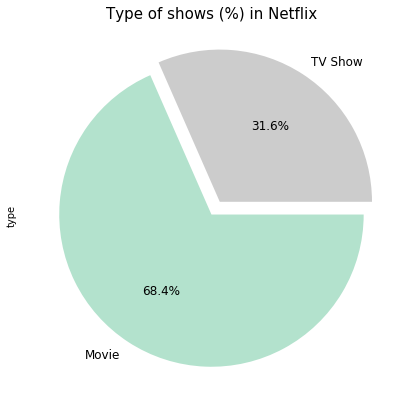

In [88]:
df.type.value_counts().plot.pie(figsize=(7,7),fontsize = 12, explode=(0, 0.1), autopct='%1.1f%%', \
                                                       counterclock = False, \
                                                       cmap = plt.get_cmap("Pastel2"))
plt.title('Type of shows (%) in Netflix', fontsize = 15);
#color reference [https://matplotlib.org/tutorials/colors/colormaps.html]

**The Pie chart indicates that between 2010 and 2019, around 68.4% of all the contents on Netflix were movies. Compared to it, TV Shows consisted of only 31.6% of the contents. It implies that movie contents have been dominating over TV shows on Netflix over the last decade.** 

In [81]:
df.rating.value_counts()

TV-MA       2027
TV-14       1698
TV-PG        701
R            508
PG-13        286
NR           218
PG           184
TV-Y7        169
TV-G         149
TV-Y         143
TV-Y7-FV      95
G             37
UR             7
NC-17          2
Name: rating, dtype: int64

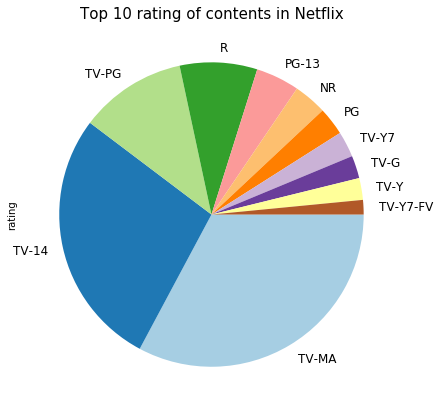

In [80]:
df.rating.value_counts()[:11].plot.pie(figsize=(7,7),fontsize = 12,  \
                                                       counterclock = False, \
                                                       cmap = plt.get_cmap("Paired"))
plt.title('Top 10 rating of contents in Netflix', fontsize = 15);

#color reference [https://matplotlib.org/tutorials/colors/colormaps.html]

**This Pie chart indicates that TV-MA and TV 14 are the two top ratings among a total of 14 ratings. All 14 ratings are TV-MA, TV-14, TV-PG, R, PG-13, NR, PG, TV-Y7, TV-G, TV-Y, TV-Y7-FV, G, UR, NC-17. Over the decades, around 2027, 1698, 701 contents were labeled TV-MA, TV 14, and TV-PG. According to TV parental guideline, TV-MA stands for Mature Audience - indicating the content is specifically designed to be viewed by adults and therefore may be unsuitable for children under 17. In contrast, programs rated TV-14 contain material that parents or adult guardians may find inappropriate for children under 14.**

In [86]:
df_movie_country['country'].unique()[:15]

array(['United States', 'India', 'South Korea', 'China', 'United Kingdom',
       'Bulgaria', 'Spain', 'Canada', 'Chile', 'Denmark', 'Sweden', nan,
       'Netherlands', 'Belgium', 'France'], dtype=object)

In [85]:
df_movie_country['country'].nunique()

107

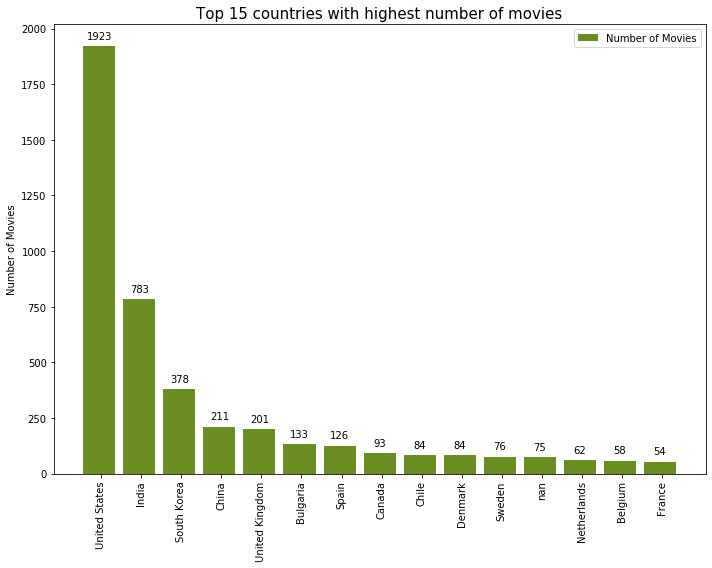

In [87]:
labels = df_movie_country['country'].unique()[:15]
number_of_movies = df_movie_country['country'].value_counts()[:15]

x = np.arange(len(labels))  # the label locations
width = 0.80  # the width of the bars

fig, ax = plt.subplots(figsize = (10,8))
rects1 = ax.bar(x - width/16, number_of_movies, width, label='Number of Movies', color = 'olivedrab')

ax.set_ylabel('Number of Movies', fontsize = 10)
ax.set_title('Top 15 countries with highest number of movies', fontsize = 15)
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=90, fontsize = 10)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 5),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects1)
fig.tight_layout()

plt.show()

#plot reference [https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barchart.html]
                #[https://robertmitchellv.com/blog-bar-chart-annotations-pandas-mpl.html]
#color reference [https://matplotlib.org/3.1.0/gallery/color/named_colors.html]
                #[https://matplotlib.org/tutorials/colors/colormaps.html]


**This chart suggests that most of the movies added to Netflix are produced in the United States, followed by India. This chart shows only the top 15 countries. As of 2019, around 1,900 American movies were added to Netflix, whereas 738 Indian movies were present on Netflix. Except for the US, India, South Korea, China, the UK, Bulgaria, Spain, all other countries have less than 100 of their movies on Netflix. There are movies from around 107 countries added to Netflix since 2010.**

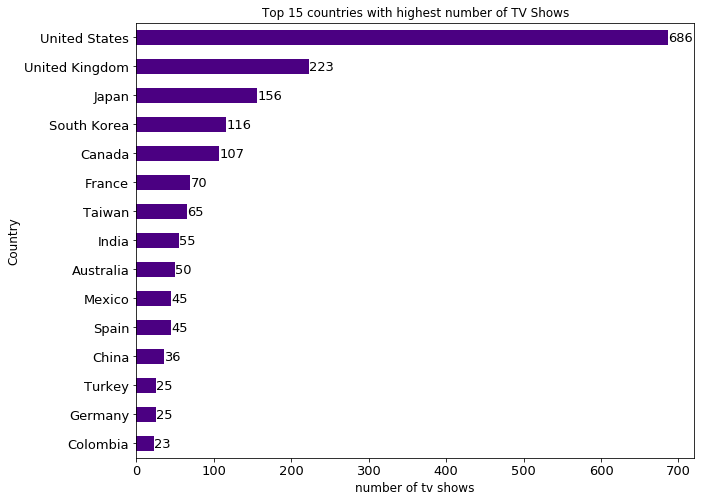

In [28]:
ax = df_tv_show_country['country'].value_counts()[:15].sort_values(ascending = True).plot(kind = 'barh', fontsize = 13, \
                                                                             figsize = (10,8), color = 'indigo')

# Code adopted and modified from http://robertmitchellv.com/blog-bar-chart-annotations-pandas-mpl.html
totals = []    ## create a list to collect the plt.patches data

# find the values and append to list
for p in ax.patches:
    totals.append(p.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for p in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(p.get_width()+.12, p.get_y()+.10, \
        int(p.get_width()), fontsize=13)
    
plt.xlabel('number of tv shows', fontsize = 12)
plt.ylabel('Country', fontsize = 12)
plt.title('Top 15 countries with highest number of TV Shows', fontsize = 12)
plt.show()

**This chart suggests that most of the TV shows added to Netflix are produced in the United States, followed by United Kindom. This chart shows only the top 15 countries. In contrast to movies, for TV shows, India stands at 8th position. there were around 700 American TV shows added to Netflix compare to only 223 UK based TV shows since 2010.**

In [29]:
#how has the number of tv shows changed through the years for countries? 
#finding the number of tv shows per country first,and the total number after


df_year_tv_show = df_tv_show_country[df_tv_show_country['country'].isin(df_tv_show_country['country'].unique()[:16])]
df_year_country_tv_show = df_year_tv_show[df_year_tv_show['type']=='TV Show'].groupby(['release_year','country']) \
                                                        ['show_id'].count().to_frame().reset_index()
df_year_all_tv_show = df_year_tv_show[df_year_tv_show['type']=='TV Show'].groupby(['release_year']) \
                                                        ['show_id'].count().to_frame().reset_index()


#reference: isin[https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isin.html]
#reference: to_frame[https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.to_frame.html]
#reference: reset_index[https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.reset_index.html]

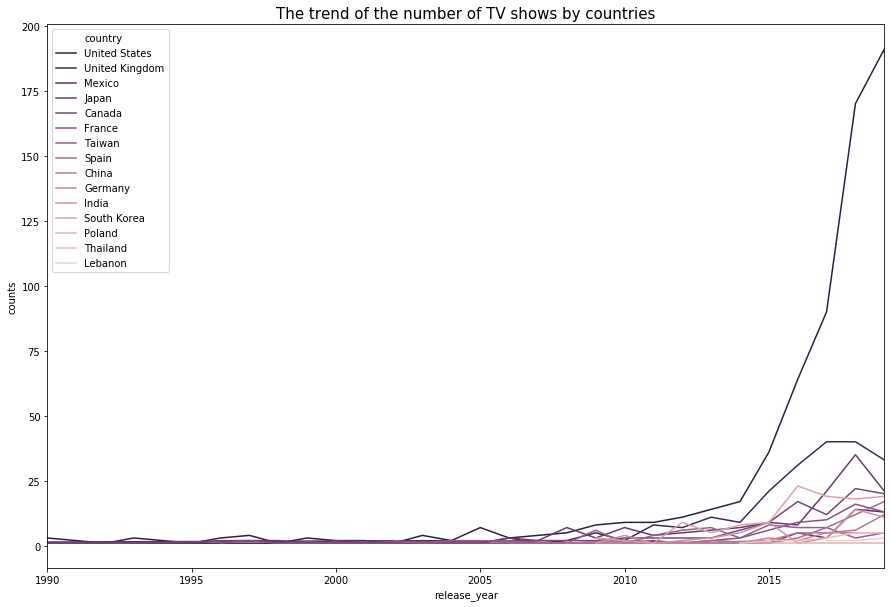

In [84]:
#how has the number of tv shows changed through the years? finding the number of tv shows per country first, and the total number after

palette = sns.cubehelix_palette(reverse=True, n_colors=15)

df_year_country_tv_show.columns.values[2]='counts'
#df_year_all_tv_show.columns.values[1]='counts'
fig, ax = plt.subplots(1,1,figsize=[15,10])
country_tv_shows = sns.lineplot(x='release_year',y='counts',data=df_year_country_tv_show,hue='country', palette=palette)
#all_tv_shows = sns.lineplot(x='release_year',y='counts',data=df_year_all_tv_show,linestyle='--',color='maroon')
#ax.text(0.83,0.9,'All TV Shows --->',transform=ax.transAxes,size=13,color='maroon')
plt.title('The trend of the number of TV shows by countries', fontsize = 15)
plt.xlim(left=1990,right=2019)
plt.show()


#reference: [https://www.kaggle.com/sohrabdaemi/netflix-tv-shows-and-movies-eda]
#reference color: [https://seaborn.pydata.org/generated/seaborn.cubehelix_palette.html]
                    #[https://seaborn.pydata.org/tutorial/color_palettes.html]
                    #[https://seaborn.pydata.org/tutorial/relational.html]

**We observed an increased number of TV shows produced in the United States added to Netflix over the decade. This is also helpful to explain why the US stands top in the total number of TV shows on Netflix. We observed that most of the American movies added to Netflix were released between 2014-2019.**

In [31]:
#how has the number of movies changed through the years for countries? 
#finding the number of movies per country first,and the total number after


df_year_movie = df_movie_country[df_movie_country['country'].isin(df_movie_country['country'].unique()[:16])]
df_year_country_movie = df_year_movie[df_year_movie['type']=='Movie'].groupby(['release_year','country']) \
                                                        ['show_id'].count().to_frame().reset_index()
df_year_all_movie = df_year_movie[df_year_movie['type']=='Movie'].groupby(['release_year']) \
                                                        ['show_id'].count().to_frame().reset_index()


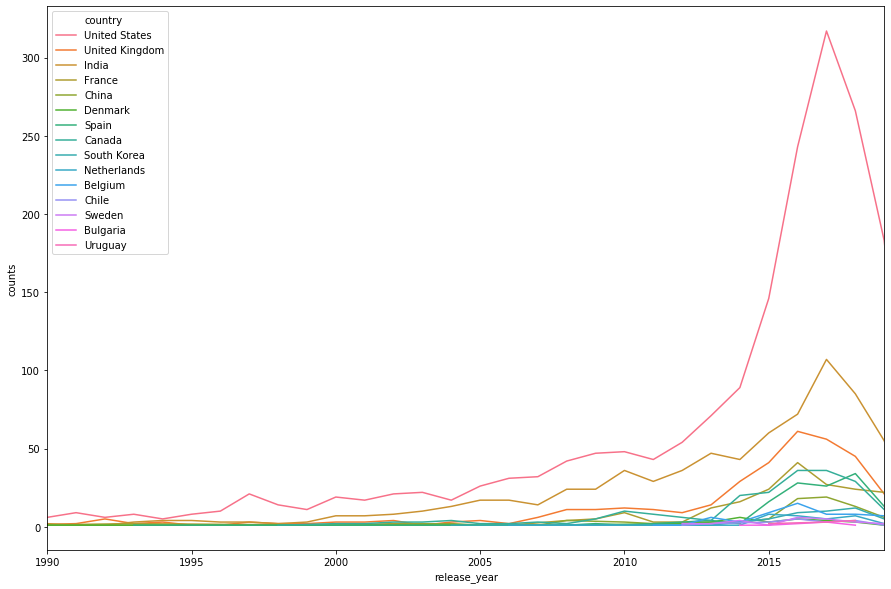

In [32]:
#palette = sns.cubehelix_palette(reverse=True, n_colors=15)

df_year_country_movie.columns.values[2]='counts'
#df_year_all_movie.columns.values[1]='counts'
fig, ax = plt.subplots(1,1,figsize=[15,10])
country_movie = sns.lineplot(x='release_year',y='counts',data=df_year_country_movie,hue='country')
#all_tv_shows = sns.lineplot(x='release_year',y='counts',data=df_year_all_tv_show,linestyle='--',color='maroon')
#ax.text(0.83,0.9,'All TV Shows --->',transform=ax.transAxes,size=13,color='maroon')
plt.xlim(left=1990,right=2019)
plt.show()


**Interestingly, the number of movies per country is declining for almost all countries after around 2016-2017. The reason could be that Netflix is now more focusing on TV shows than movies.**

In [33]:
df_movie = df[df['type'] == 'Movie']
df_movie['duration']= df_movie.loc[:, 'duration'].str.strip('min').astype(int);

C:\Users\Bruker\Anaconda3\envs\DSI\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [34]:
print('The average duration of movies is :', np.round(df_movie['duration'].mean(),2))

The average duration of movies is : 99.1


Text(0, 0.5, 'Duration')

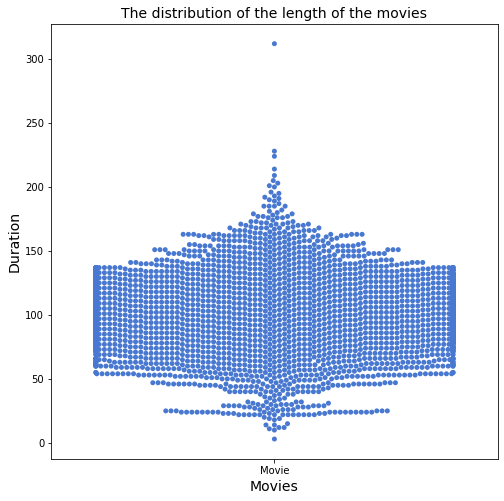

In [91]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 8)
ax = sns.swarmplot(data=df_movie, x='type', y='duration', palette="muted", )

ax.set_title('The distribution of the length of the movies', fontsize = 14)
ax.set_xlabel('Movies', fontsize = 14)
ax.set_ylabel('Duration', fontsize = 14)

**This distribution graph shows that most of the movies on Netflix have a duration of around 100 minutes. The exact average duration is 99 minutes for movies, which is approximately 1 hour and 40 minutes.**

In [36]:
df_tv_show = df[df['type'] == 'TV Show']
df_tv_show['duration']= df_tv_show.loc[:, 'duration'].str.strip('Seaons').astype(int);

C:\Users\Bruker\Anaconda3\envs\DSI\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [37]:
print('The average season of tv shows is :', np.round(df_tv_show['duration'].mean(),2))

The average season of tv shows is : 1.78


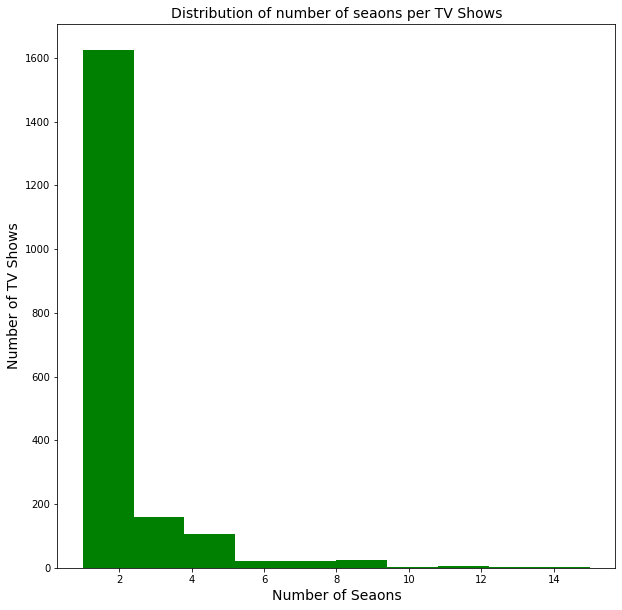

In [89]:
plt.figure(figsize=(10,10))
plt.hist(df_tv_show['duration'], color ='green')
plt.title('Distribution of number of seaons per TV Shows', fontsize = 14)
plt.xlabel('Number of Seaons', fontsize = 14);
plt.ylabel('Number of TV Shows', fontsize = 14);

**We observed that most of the TV shows listed on Netflix have around 1-2 seasons. A few of them have above five seasons as well.**

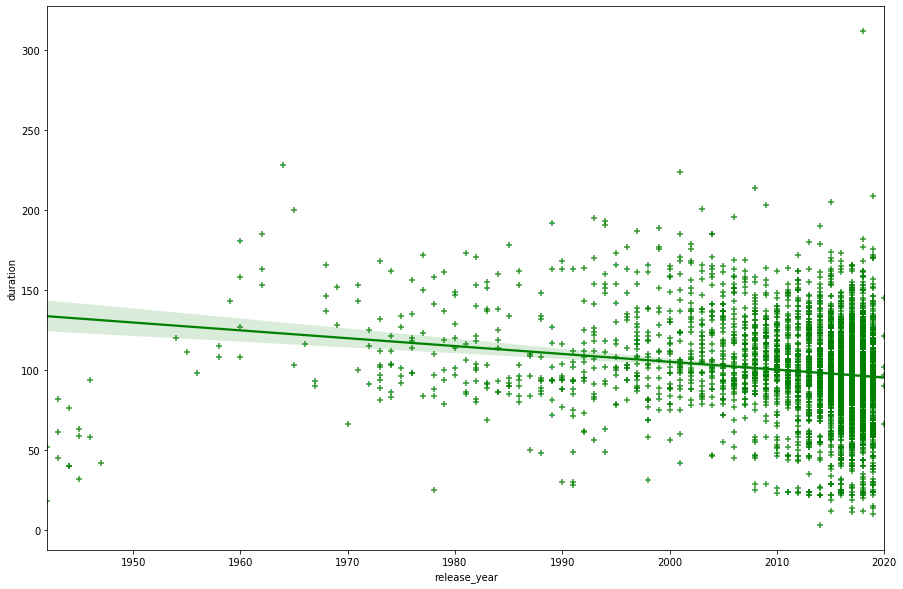

In [41]:
fig,ax=plt.subplots(1,1,figsize=(15,10))
sns.regplot(x='release_year',y='duration',data=df_movie, color="g", marker="+")
plt.show()

#https://seaborn.pydata.org/generated/seaborn.regplot.html

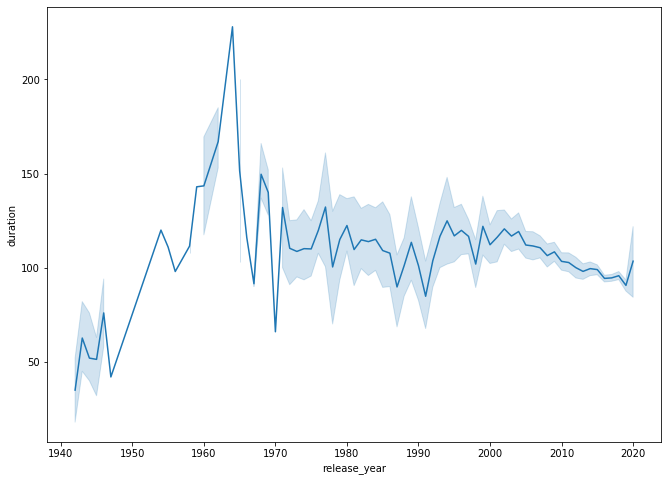

In [43]:
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)
ax =sns.lineplot(data=df_movie, x='release_year', y="duration")
#https://seaborn.pydata.org/generated/seaborn.lineplot.html

**This graph shows the changes in the duration of movies over the years and we can see that movies from 1940 had lower duration compared to recent movies. There were also movies  with duration below 1 hour and above 3 hours. However, from around the 1970s, most movies have a duration between 1.5 hrs and 2 hrs.**

In [44]:
df_movie_director = df[df['type']=='Movie'].assign(director=df['director'].str.split(', ')).explode('director')

In [46]:
df_movie_director['director'].nunique()

3535

In [53]:
df_movie_director['director'].value_counts()[:20]

Jan Suter              21
Raúl Campos            19
Jay Karas              14
Marcus Raboy           14
Jay Chapman            12
Martin Scorsese         9
Steven Spielberg        9
Johnnie To              8
David Dhawan            8
Shannon Hartman         8
Umesh Mehra             8
Lance Bangs             8
Hakan Algül             7
Cathy Garcia-Molina     7
Noah Baumbach           7
Ryan Polito             7
Dibakar Banerjee        7
S.S. Rajamouli          7
Robert Rodriguez        7
Yılmaz Erdoğan          7
Name: director, dtype: int64

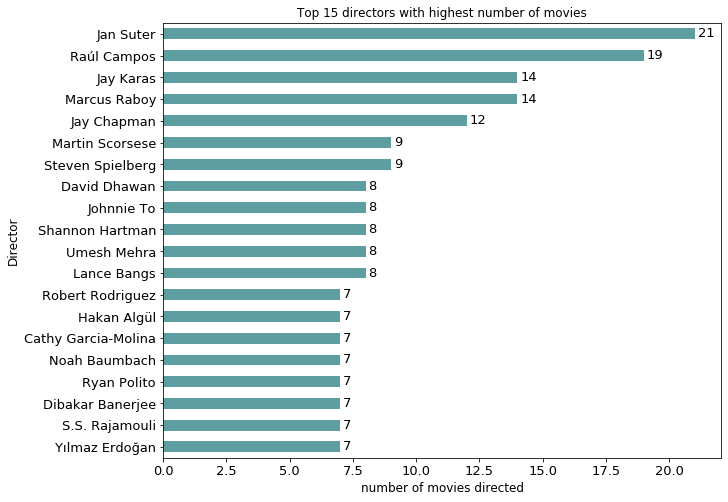

In [57]:
ax = df_movie_director['director'].value_counts()[:20].sort_values(ascending = True).plot(kind = 'barh', fontsize = 13, \
                                                                             figsize = (10,8), color = 'cadetblue')

# Code adopted and modified from http://robertmitchellv.com/blog-bar-chart-annotations-pandas-mpl.html
totals = []    ## create a list to collect the plt.patches data

# find the values and append to list
for p in ax.patches:
    totals.append(p.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for p in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(p.get_width()+.12, p.get_y()+.10, \
        int(p.get_width()), fontsize=13)
    
plt.xlabel('number of movies directed', fontsize = 12)
plt.ylabel('Director', fontsize = 12)
plt.title('Top 15 directors with highest number of movies', fontsize = 12)
plt.show()

**We don't have list of directors of all the Netflix programs since 2009. We had missing values for around 1969 directors. We have a list of directors for about 4265 Netflix programs. However, this above list shows the top 15 directors with the highest number of movies added on Netflix over the last decade, and we see that Jan Suter stands top in the list, followed by director Rail Campos.**

#### Data Reference:
This data was collected from kaggle. The link is given below:
- [Kaggle Link](#https://www.kaggle.com/leonardopena/top-spotify-songs-from-20102019-by-year)
- the data was uploaded by Shivam Bansal on Kaggle 